In [1]:
import tensorflow as tf
import os
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Dense
from keras.models import Sequential, load_model
from keras.metrics import Precision, Recall, BinaryAccuracy
from keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
#pathlib would make errors on the image extension when iterating 
# through the data, so imghdr would be a better alternative
import imghdr
import cv2
import numpy as np

SEED = 42
np.random.seed(SEED)

C:\Users\nishi\AppData\Local\Temp\ipykernel_3976\2847868086.py:10: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
data_dir = 'data'
log_dir = 'logs'
image_ext = ['jpeg', 'jpg', 'png', 'bmp']

In [3]:
cat_images = os.listdir(os.path.join(data_dir, 'cat'))
dog_images = os.listdir(os.path.join(data_dir, 'dog'))
print(cat_images[0])
print(dog_images[0])

07CAT-STRIPES-mediumSquareAt3X-v2.jpg
-puppy-dog-sitting-frontal-looking-camera-isolated-white-background-46868560.jpg


In [4]:
image = cv2.imread(os.path.join(data_dir, 'cat', '07CAT-STRIPES-mediumSquareAt3X-v2.jpg'))
image.shape

(1800, 1800, 3)

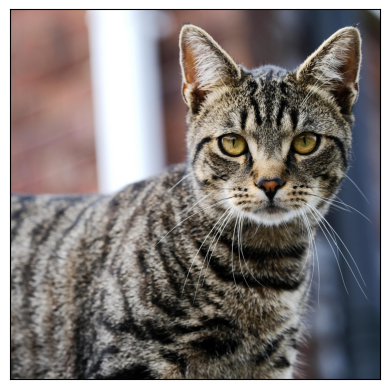

In [5]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
for imageClass in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, imageClass)):
    image_path = os.path.join(data_dir, imageClass, image)
    try:
      extension = imghdr.what(image_path)
      if extension not in image_ext:
        print(f"Unsupported Image Extension: {image_path}")
        os.remove(image_path)
    except Exception as e:
      print(f"Issue with Image path: {image_path}")
      os.remove(image_path)
  

In [7]:
image_height = 256
image_width = 256
#image_dataset_from_directory is already deafulted to imgsize=(256,256)

In [8]:
data = image_dataset_from_directory(data_dir,
                                    image_size=(image_height, image_width))

Found 420 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

In [16]:
batch[0]

array([[[[4.20585938e+01, 9.20703125e+01, 0.00000000e+00],
         [5.21582031e+01, 1.04228516e+02, 0.00000000e+00],
         [6.10292969e+01, 1.17205078e+02, 0.00000000e+00],
         ...,
         [5.40546875e+01, 9.69960938e+01, 5.27871094e+01],
         [5.88945312e+01, 1.03859375e+02, 4.70703125e+01],
         [6.49648438e+01, 1.09964844e+02, 5.09765625e+01]],

        [[5.09689255e+01, 1.00980644e+02, 0.00000000e+00],
         [6.04131622e+01, 1.12483475e+02, 5.59616089e-02],
         [6.80518570e+01, 1.24190331e+02, 3.31417084e+00],
         ...,
         [6.57606125e+01, 1.08065300e+02, 6.18528900e+01],
         [6.78645554e+01, 1.12192680e+02, 5.28679352e+01],
         [7.13469543e+01, 1.13811272e+02, 5.41750793e+01]],

        [[6.31450500e+01, 1.13154457e+02, 4.13024902e-01],
         [7.06395493e+01, 1.22308395e+02, 3.67334747e+00],
         [7.71759415e+01, 1.32469391e+02, 1.07053986e+01],
         ...,
         [8.12593842e+01, 1.21297485e+02, 7.14823608e+01],
         [

In [ ]:
batch[1]

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0])

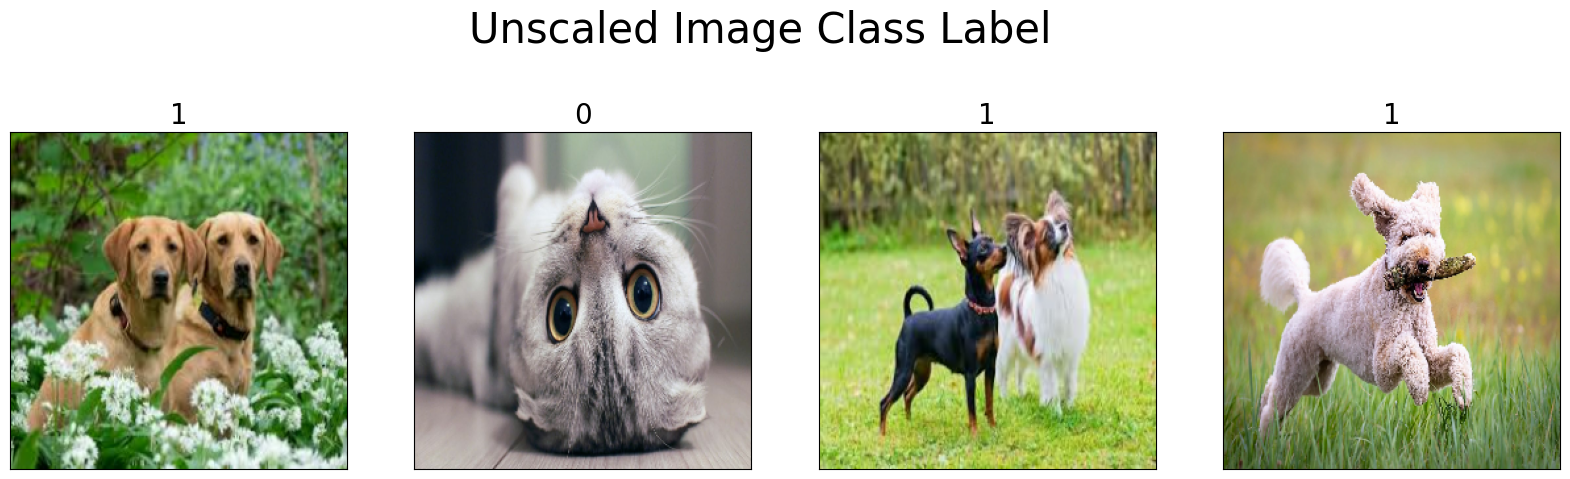

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20, 6))
fig.suptitle("Unscaled Image Class Label", fontsize=30)
for i, img in enumerate(batch[0][:4]):
  ax[i].imshow(img.astype(int))
  ax[i].set_title(batch[1][i], fontsize=20)
  ax[i].set_xticks([])
  ax[i].set_yticks([])
#Cat is 0
#Dog is 1

In [14]:
#Be sure to run this code once as it may turn all pixel values into small values
data = data.map(lambda x, y: (x/255, y))

In [15]:
scaled_iterator = data.as_numpy_iterator()

In [16]:
batch = scaled_iterator.next()

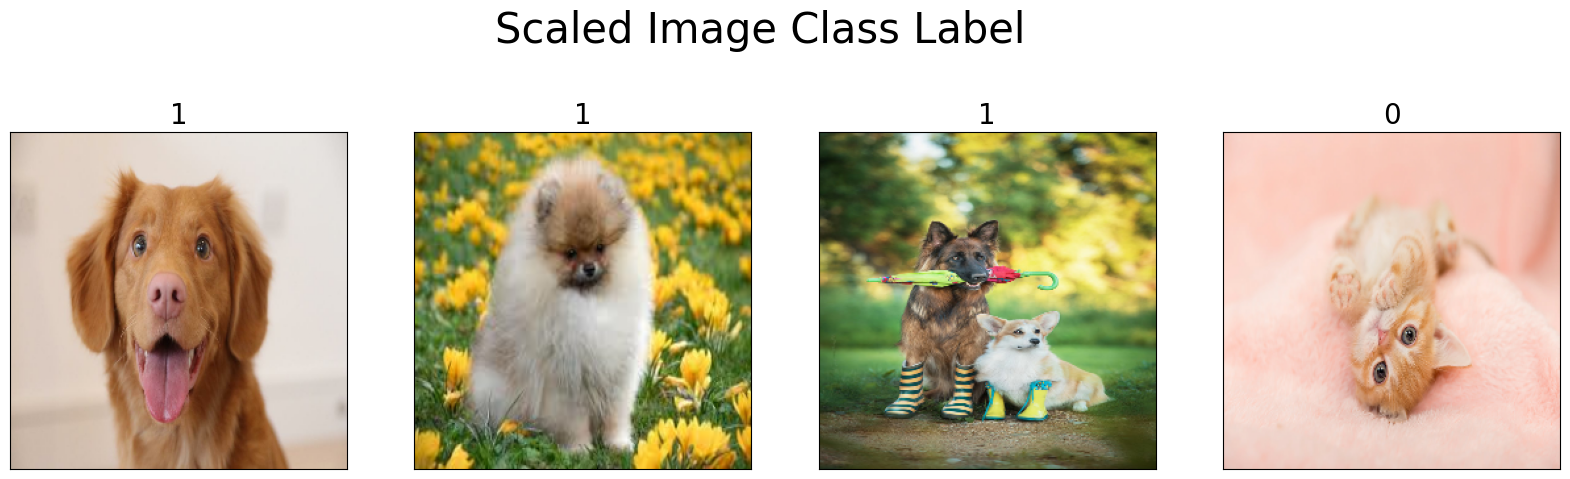

In [17]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20, 6))
fig.suptitle("Scaled Image Class Label", fontsize=30)
for i, img in enumerate(batch[0][:4]):
  ax[i].imshow(img) #Dont use astype(int) as it would round to 0, 1
  ax[i].set_title(batch[1][i], fontsize=20)
  ax[i].set_xticks([])
  ax[i].set_yticks([])

In [18]:
len(data)

14

In [19]:
train_size = int(len(data) * 0.7)
valid_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

In [20]:
print(f"Train Size: {train_size}")
print(f"Valid Size: {valid_size}")
print(f"Test Size: {test_size}")
#If any of the size is 0, either get more data or lower the batch size
# A size of 0 would make errors, which you would not be able to compute
# the test accuracy, recall, and precision

Train Size: 9
Valid Size: 2
Test Size: 1


In [21]:
train = data.take(train_size)
valid = data.skip(train_size).take(valid_size)
test = data.skip(train_size + valid_size).take(test_size)

In [22]:
# def VGG16():  
#   model = Sequential([
#     Conv2D(64, (3,3), 1, 'Same', activation='relu', input_shape=(image_height, image_width, 3)),
#     Conv2D(64, (3,3), 1, 'Same', activation='relu'),
#     MaxPool2D((2,2), (2,2)),
#     Conv2D(128, (3,3), 1, 'Same', activation='relu'),
#     Conv2D(128, (3,3), 1, 'Same', activation='relu'),
#     MaxPool2D((2,2), (2,2)),
#     Conv2D(256, (3,3), 1, 'Same', activation='relu'),
#     Conv2D(256, (3,3), 1, 'Same', activation='relu'),
#     Conv2D(256, (3,3), 1, 'Same', activation='relu'),
#     MaxPool2D((2,2), (2,2)),
#     Conv2D(512, (3,3), 1, 'Same', activation='relu'),
#     Conv2D(512, (3,3), 1, 'Same', activation='relu'),
#     Conv2D(512, (3,3), 1, 'Same', activation='relu'),
#     MaxPool2D((2,2), (2,2)),
#     Conv2D(512, (3,3), 1, 'Same', activation='relu'),
#     Conv2D(512, (3,3), 1, 'Same', activation='relu'),
#     Conv2D(512, (3,3), 1, 'Same', activation='relu'),
#     MaxPool2D((2,2), (2,2)),
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dense(128, activation='relu'),
#     Dense(1, activation='linear')
#   ])

#   return model

In [23]:
model = Sequential([
  Conv2D(16, (3,3), 1, padding='Same', activation='relu', input_shape=(image_height, image_width, 3)), 
  MaxPool2D(),
  Conv2D(32, (3,3), 1, padding='Same', activation='relu'),
  MaxPool2D(),
  Conv2D(16, (3,3), 1, padding='Same', activation='relu'),
  MaxPool2D(),
  Dropout(0.2), 
  Flatten(),
  Dense(256, activation='relu'),
  Dense(1), #Linear activation (default) to apply from_logits=True
  ])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 16)        0

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [27]:
batch_size = 32
epochs = 20

In [28]:
history = model.fit(train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=valid,
                    callbacks=[tensorboard_callback]) 

Epoch 1/20
9/9 [==============================] - 24s 2s/step - loss: 1.0135 - accuracy: 0.5278 - val_loss: 0.6929 - val_accuracy: 0.5469
Epoch 2/20
9/9 [==============================] - 26s 2s/step - loss: 0.6853 - accuracy: 0.5590 - val_loss: 0.6750 - val_accuracy: 0.5469
Epoch 3/20
9/9 [==============================] - 31s 3s/step - loss: 0.6525 - accuracy: 0.5868 - val_loss: 0.6077 - val_accuracy: 0.7344
Epoch 4/20
9/9 [==============================] - 30s 3s/step - loss: 0.6037 - accuracy: 0.6562 - val_loss: 0.5653 - val_accuracy: 0.7969
Epoch 5/20
9/9 [==============================] - 28s 3s/step - loss: 0.5367 - accuracy: 0.7222 - val_loss: 0.4343 - val_accuracy: 0.7812
Epoch 6/20
9/9 [==============================] - 28s 3s/step - loss: 0.4432 - accuracy: 0.7917 - val_loss: 0.3123 - val_accuracy: 0.9219
Epoch 7/20
9/9 [==============================] - 29s 3s/step - loss: 0.3219 - accuracy: 0.8646 - val_loss: 0.2829 - val_accuracy: 0.7812
Epoch 8/20
9/9 [==================

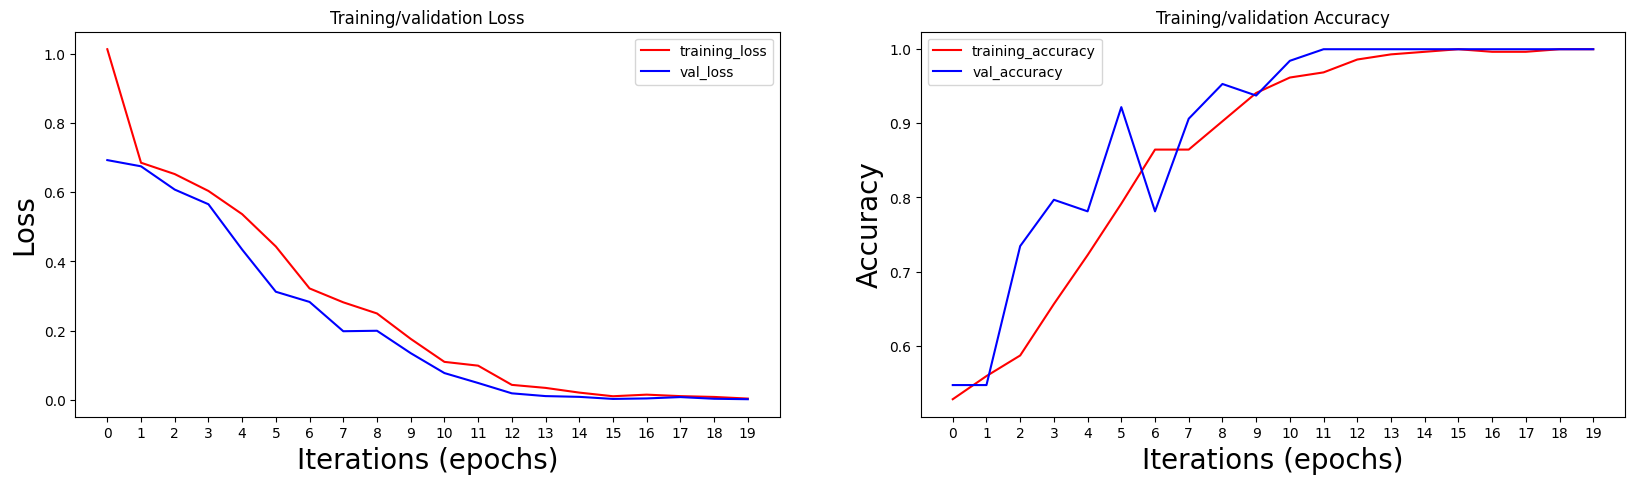

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].set_title("Training/validation Loss")
ax[0].plot(history.history['loss'], label='training_loss', color='red')
ax[0].plot(history.history['val_loss'], label='val_loss', color='blue')
ax[0].set_xlabel("Iterations (epochs)", fontsize=20)
ax[0].set_ylabel("Loss", fontsize=20)
ax[0].set_xticks(range(0, 20))
ax[0].legend()

ax[1].set_title("Training/validation Accuracy")
ax[1].plot(history.history['accuracy'], label='training_accuracy', color='red')
ax[1].plot(history.history['val_accuracy'], label='val_accuracy', color='blue')
ax[1].set_xlabel("Iterations (epochs)", fontsize=20)
ax[1].set_ylabel("Accuracy", fontsize=20)
ax[1].set_xticks(range(0, 20))
ax[1].legend()
plt.show()

In [30]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = tf.nn.sigmoid(model.predict(X))
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  accuracy.update_state(y, yhat)

1/1 [==============================] - 1s 1s/step


In [32]:
print(f"Accuracy: {accuracy.result().numpy()} Precision: {precision.result().numpy()} Recall: {recall.result().numpy()}")

Accuracy: 1.0 Precision: 1.0 Recall: 1.0


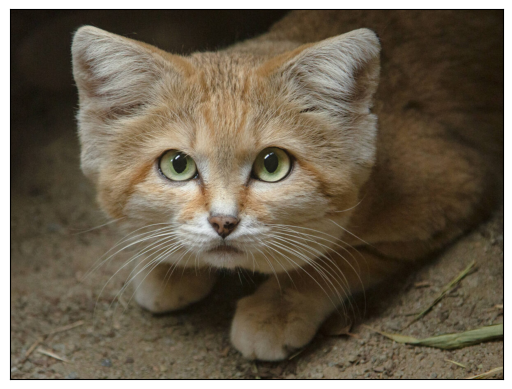

In [33]:
cat_image = cv2.imread('cattest.jpg')
plt.imshow(cv2.cvtColor(cat_image, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()

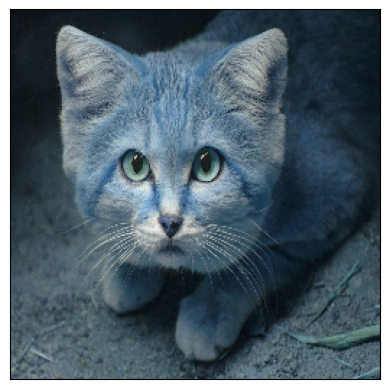

In [34]:
resized_cat_image = tf.image.resize(cat_image, (image_height, image_width))
plt.imshow(resized_cat_image.numpy().astype(int))
plt.xticks([])
plt.yticks([])
plt.show()

In [35]:
resized_cat_image = resized_cat_image / 255

In [36]:
cat_image = np.expand_dims(resized_cat_image, axis=0)

In [37]:
yhat = tf.nn.sigmoid(model.predict(cat_image))

1/1 [==============================] - 0s 194ms/step


In [38]:
if yhat > 0.5:
  print("Woof")
else: 
  print("Meow")
print(yhat.numpy())

Meow
[[0.00314189]]


In [50]:
model.save(os.path.join('models', 'classifier.keras'))

In [51]:
new_model = load_model(os.path.join('models', 'classifier.keras'))

In [52]:
yhat = tf.nn.sigmoid(model.predict(cat_image))

1/1 [==============================] - 0s 61ms/step


In [53]:
#Test if saved model is consistent with the prediction
if yhat > 0.5:
  print("woof")
else:
  print("meow")

meow
